1) Bùi Văn Thống - 52100934
2) Trần Văn Phát - 52100919
3) Nguyễn Minh Phú - 52100920

# Phần demo các model Học Máy cơ bản

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import copy
from sklearn.model_selection import train_test_split

In [30]:
from importlib import reload

In [2]:
df = pd.read_csv('./TrafficTwoMonth.csv')

In [3]:
df.head(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


Target của dataset này là "Traffic Situation" trong đó có 4 lớp

In [4]:
np.unique(df['Traffic Situation'].values)

array(['heavy', 'high', 'low', 'normal'], dtype=object)

### Spliting dataset

Tách thành tập train và test, để dành cho việc tách tập train thành 1 tập validation sau này

In [5]:
Train, Test = train_test_split(df, test_size=0.25, random_state=2022)

In [6]:
print("Shape of train: ", Train.shape)
print("Shape of test", Test.shape)

Shape of train:  (4464, 9)
Shape of test (1488, 9)


### Preprocessing

Biểu đồ dưới đây nhằm mục đích đánh số cho các feature và target thuộc categorical là "Day of the week" và "Traffic Situation" 

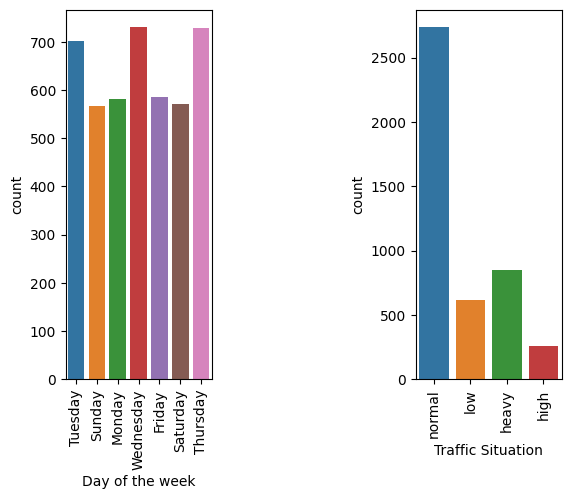

In [7]:
plt.subplot(1, 3, 1)
sns.countplot(x = Train["Day of the week"])
plotter.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x = Train["Traffic Situation"])
plotter.xticks(rotation = 90)
plt.show()

Trong dataset này 2 categorial features là "Time" và "Day of the week" và một target cũng có categorical.\
Thông thường với các categorical features dạng thứ thứ bậc ta có thể dùng OrdinalEncoder trong sklearn để thực hiện việc encode. \
OrdinalEncoder giúp ta có thể encode n categories trong 1 categorical feature thành các số nguyên từ 0 đến n - 1. \
Tuy nhiên, OrdinalEncoder encode các categories một cách ngẫu nhiên.

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
tmpTrain = Train
enc  = OrdinalEncoder()
enc.fit_transform(np.array([tmpTrain['Day of the week']]).reshape(-1, 1))
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in day_of_week :
    print(f'Category: {day} -> Encode {enc.transform(np.array([[day]]).reshape(-1, 1))}')

Category: Monday -> Encode [[1.]]
Category: Tuesday -> Encode [[5.]]
Category: Wednesday -> Encode [[6.]]
Category: Thursday -> Encode [[4.]]
Category: Friday -> Encode [[0.]]
Category: Saturday -> Encode [[2.]]
Category: Sunday -> Encode [[3.]]


Vì mục tiêu là dự đoán chính xác, chúng tôi cài đặt thủ công về việc encode "Day of the week" thủ công. \
Tương tự đối với target "Traffic Situation", ta cũng có thể encode bằng LabelEncoder trong sklearn, tuy nhiên vẫn phải encode thủ công.\
Còn với feature "Time" ta có thể dùng OrdinalEncoder (hoặc LabelEncoder) để thực hiện encode.

In [10]:
import helper

In [11]:
Train, Test = helper.encode(Train, Test)

Sau khi đã thực hiện việc encode các categorical features. Bước tiếp theo là scale data về một khoảng nào đó để dễ tính toán.\
Chúng tôi, xin sử dụng StandardScaler trong sklearn đễ thực hiện.\
Đầu tiên cần tách thêm một lần nữa 2 tập Train, Test thành X_Train, y_train, X_test, y_test.

In [12]:
X_train, y_train, X_test, y_test = helper.get_features_target(Train, Test)

In [13]:
print('X_train:')
print(X_train)
print('='*64)

print('y_train:')
print(y_train)
print('='*64)

print('X_test:')
print(X_test)
print('='*64)

print('y_test:')
print(y_test)
print('='*64)

X_train:
[[ 94.   7.   2. ...  40.   9.  90.]
 [  2.  15.   7. ...  11.  13.  75.]
 [ 11.  30.   1. ...   0.  31.  41.]
 ...
 [ 75.  11.   3. ...   9.  32. 114.]
 [  9.  22.   7. ...   1.  22.  32.]
 [ 11.  30.   1. ...   0.  27.  42.]]
y_train:
[1 0 1 ... 2 1 1]
X_test:
[[ 85.  28.   6. ...  15.  32. 129.]
 [ 17.  22.   7. ...   1.  26.  91.]
 [ 69.   7.   2. ...  11.  32. 108.]
 ...
 [ 95.  29.   7. ...   2.  29.  38.]
 [ 57.  16.   1. ...  33.  13. 184.]
 [  2.  20.   5. ...  16.  10. 153.]]
y_test:
[2 1 1 ... 1 3 1]


Tiếp theo đây sẽ scale các tập X.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print(X_train[:5])

[[ 1.69034024 -1.00172781 -0.98151375 -0.77574704 -0.19149055  2.17830363
  -0.88135625 -0.34788115]
 [-1.64720364 -0.10648998  1.6037337  -0.44093537 -0.62828863 -0.15215218
  -0.51434372 -0.61623116]
 [-1.32070479  1.57208095 -1.49856324 -1.26680415 -0.97772709 -1.03611817
   1.13721265 -1.22449117]
 [-0.55887412  1.46017622  1.6037337  -1.06591715 -0.71564824 -0.95575763
   1.13721265 -0.99192116]
 [ 0.42062246 -1.11363254 -1.49856324  1.18848142  1.38098252  2.6604669
  -0.88135625  1.65579887]]


### Sử dụng các models học máy cơ bản

Vì vấn đề trong bài toán này là Classification, nên chúng tôi sẽ sử dụng các mô hình học máy giải quyết về vấn đề classification.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC

Chúng tôi cũng sử dụng classification_report để đáng giá các model

In [18]:
from sklearn.metrics import classification_report

Để đảm bảo tính công bằng các model sẽ không được cài đặt các tham số mà chỉ để các tham số ở mặc định

In [19]:
clfs = [
    KNeighborsClassifier(), 
    LogisticRegression(), 
    GaussianNB(), 
    RandomForestClassifier(), 
    AdaBoostClassifier(), 
    GradientBoostingClassifier(), 
    BaggingClassifier(), 
    SVC()
]

In [24]:
f1_scores = dict()
accuracies = dict()
num_categories = 4

for clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    name = clf
    clf_dict = classification_report(y_test, y_pred, output_dict=True)

    # In ra màn hình các chỉ số có trong classification report
    print(name)
    print(classification_report(y_test, y_pred))
    print('='*64)

    # Thu thập dữ liệu cho việc in biểu đồ so sánh
    model_f1_scores = []
    for i in range(num_categories): # label được encode thành 0, 1, 2, 3
        model_f1_scores.append(clf_dict[str(i)]['f1-score'])

    # f1_scores là một dict với key là tên các models và values là 1 array chứa các giá trị f1-score cho từng class
    f1_scores[str(clf)[:-2]] = copy.copy(model_f1_scores)

    # accuracies là một dict với key là tên các models và values là 1 số thực biểu thị cho accuracy
    accuracies[str(clf)[:-2]] = copy.copy(clf_dict['accuracy'])

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       219
           1       0.90      0.96      0.93       874
           2       0.76      0.49      0.60       110
           3       0.93      0.93      0.93       285

    accuracy                           0.90      1488
   macro avg       0.88      0.81      0.84      1488
weighted avg       0.90      0.90      0.90      1488

LogisticRegression()
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       219
           1       0.87      0.94      0.91       874
           2       0.77      0.40      0.53       110
           3       0.96      0.98      0.97       285

    accuracy                           0.88      1488
   macro avg       0.86      0.77      0.80      1488
weighted avg       0.88      0.88      0.87      1488

GaussianNB()
              precision    recall  f1-score   support

           0      

Plot graph chỉ số accuaracy cho mỗi model

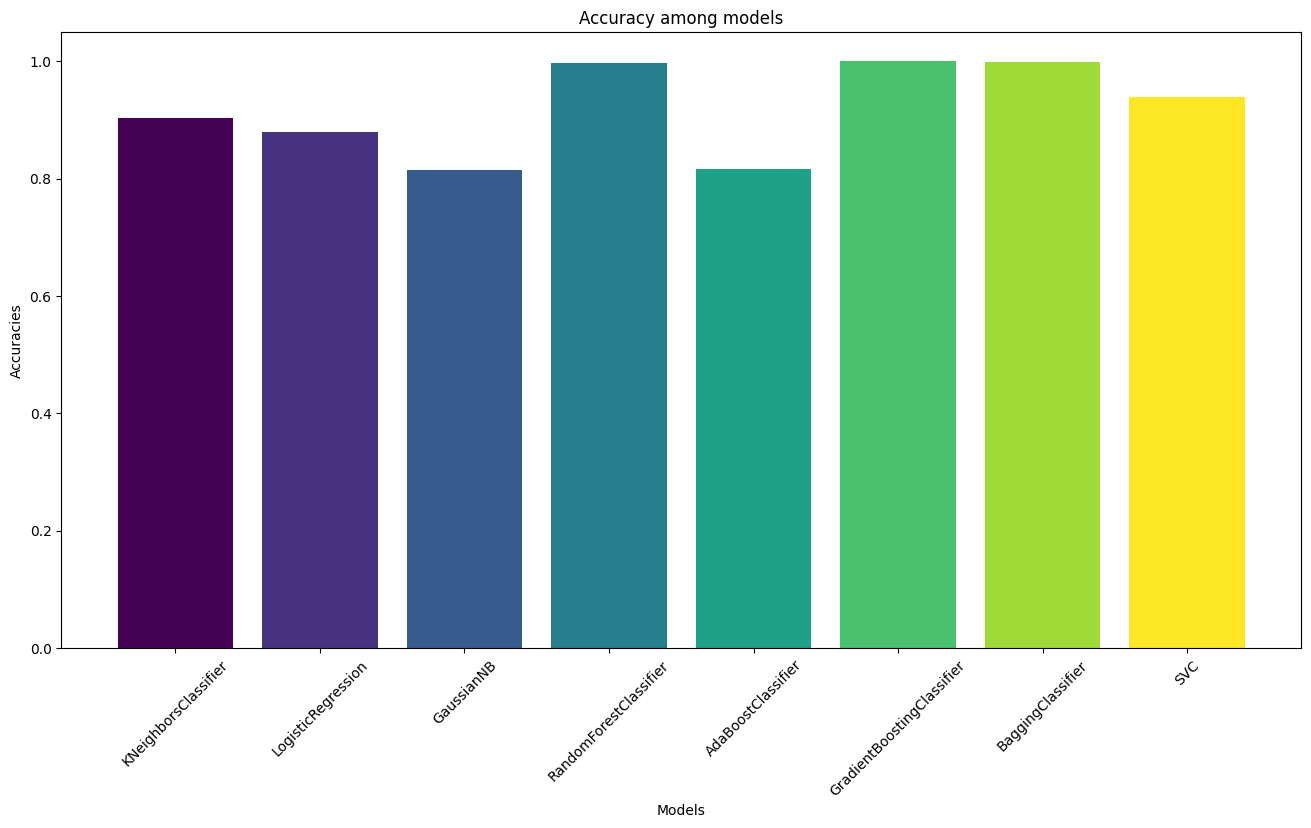

In [35]:
helper.plot_bar_chart(accuracies)

Plot graph chỉ số f1-score cho từng classes của từng model

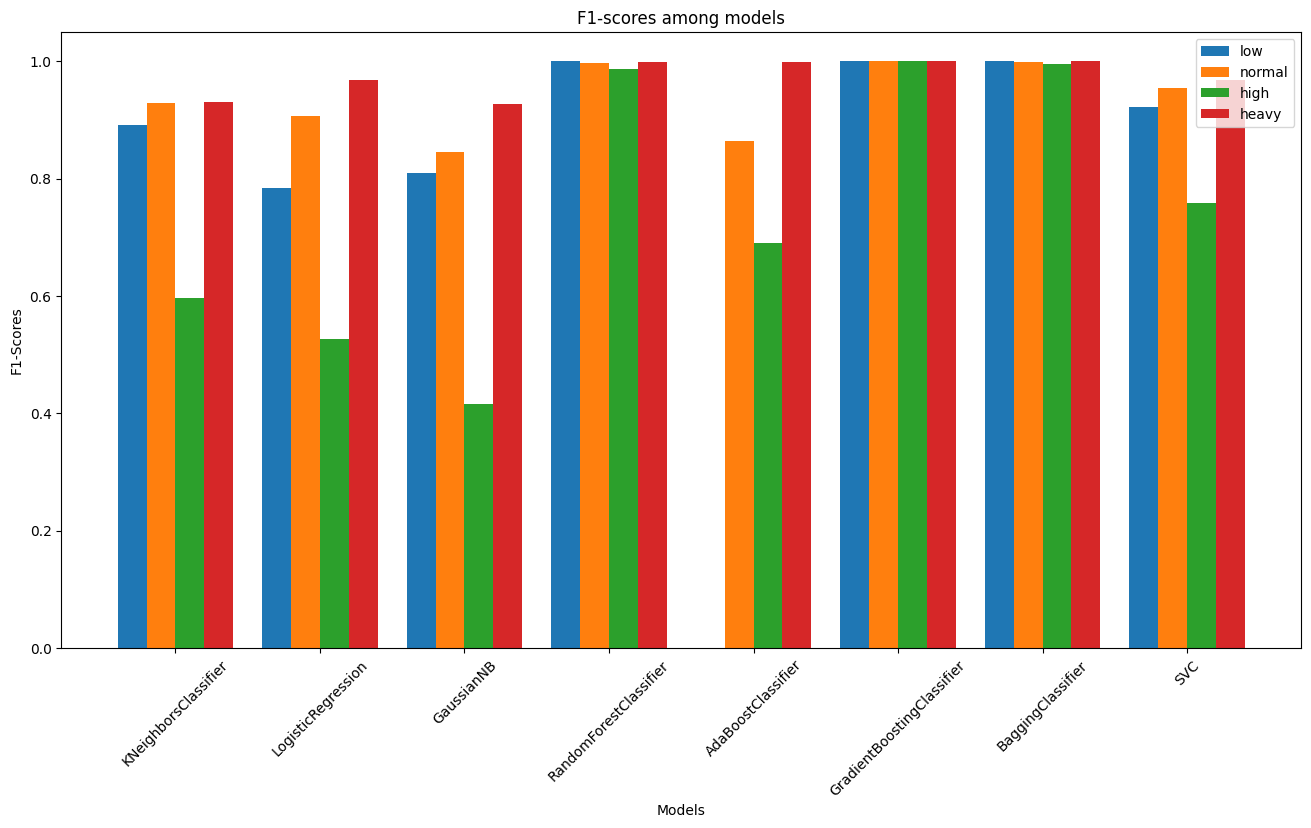

In [49]:
name_models, model_f1_scores = list(f1_scores.keys()), list(f1_scores.values())
helper.plot_grouped_barchart(['low', 'normal', 'high', 'heavy'], 
                             model_f1_scores, name_models, xlabel='Models', ylabel='F1-Scores', titile='F1-scores among models')

Các mô hình Học Máy cơ bản có tỉ lệ dự đoán đúng cao, ví dụ như ở chỉ số accurancy của các mô hình luôn nằm trong khoảng từ 0.8 đến 1.0.\
Trong đó các mô hình dự đoán cao nhất có accuracy là 1.0 là Random Forest Classifier, Gradient Boosting Classifier, Bagging Classifier.\
Tuy nhiên, khi plot chỉ số f1-score cho từng classes của từng models ta thấy rằng Adaboost không dự đoán được class normal.\
Điều này thể hiện model Adaboost dự đoán rất tệ mặc dù chỉ số accuracy của nó ở mức cao.